In [1]:
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import numpy as np
import aplpy
from astropy import units 

import matplotlib
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
import astropy.io.ascii as ascii 

import matplotlib.gridspec as gridspec

from astropy import constants as astropyC
from scipy.stats.kde import gaussian_kde
import seaborn as sns
from pyqt_fit import kde
from pyqt_fit import kde, kde_methods

#import networkx as nx

matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams['axes.linewidth'] = 2.0 #set the value globally
matplotlib.rcParams['axes.linewidth']=2
matplotlib.rcParams['xtick.labelsize']=14
matplotlib.rcParams['ytick.labelsize']=14
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['lines.linewidth']=1.5
plt.rcParams['axes.linewidth'] = 2.

import warnings
warnings.filterwarnings('ignore')

In [2]:

filename_original='NGC6334-V.txt'
col_names=['RA', 'DEC', 'Sum', 'a', 'b', 'P.A.', 'sum error', 'a_error', 'b_error', 'PA_error', 'Peak Intensity']

starts=np.array([6,31,57, 82, 107, 132, 157, 182, 207, 232, 258])
ends=np.hstack((starts[1:],280))
widths=ends-starts

table1_original=pd.read_fwf(filename_original, names=col_names, widths=widths)
table1_original = table1_original.iloc[0:] 
table1_original.tail()

,RA,DEC,Sum,a,b,P.A.,sum error,a_error,b_error,PA_error,Peak Intensity
23,259.989366,-35.965945,0.042590,4.084,1.212,16.63,0.000457,0.04581,0.01369,0.41,NaN
24,259.988614,-35.966136,0.032181,2.375,1.536,-1.06,0.000394,0.03052,0.01977,0.17,NaN
25,259.986102,-35.966166,0.045976,3.006,1.602,10.04,0.000460,0.03176,0.01697,1.01,NaN
26,259.992229,-35.960603,0.097827,3.947,2.740,9.15,0.000678,0.02866,0.01944,2.61,NaN
27,259.987593,-35.968645,0.143976,4.391,2.649,43.69,0.000797,0.02898,0.01737,4.05,NaN


In [3]:
# Convert RA and DEC to x and y coordinates

ra=table1_original['RA']
ra=np.array(ra)
ra=[float(ra) for ra in ra]

dec=table1_original['DEC']
dec=np.array(dec)
dec=[float(dec) for dec in dec]


Mean distance = 0.06378110973003127
Median distance = 0.04193608425121942
Max distance = 0.29566943250504535
Max distance = 46.91250422742552
X= [0.01960839 0.02239689 0.02518538 0.02797388 0.03076237 0.03355087
 0.03633936 0.03912786 0.04191635 0.04470485 0.04749334 0.05028184
 0.05307034 0.05585883 0.05864733 0.06143582 0.06422432 0.06701281
 0.06980131 0.0725898  0.0753783  0.07816679 0.08095529 0.08374378
 0.08653228 0.08932078 0.09210927 0.09489777 0.09768626 0.10047476
 0.10326325 0.10605175 0.10884024 0.11162874 0.11441723 0.11720573
 0.11999422 0.12278272 0.12557122 0.12835971 0.13114821 0.1339367
 0.1367252  0.13951369 0.14230219 0.14509068 0.14787918 0.15066767
 0.15345617 0.15624466 0.15903316 0.16182165 0.16461015 0.16739865
 0.17018714 0.17297564 0.17576413 0.17855263 0.18134112 0.18412962
 0.18691811 0.18970661 0.1924951  0.1952836  0.19807209 0.20086059
 0.20364909 0.20643758 0.20922608 0.21201457 0.21480307 0.21759156
 0.22038006 0.22316855 0.22595705 0.22874554 0.23153

Text(0.5, 0, 'Distance (pc)')

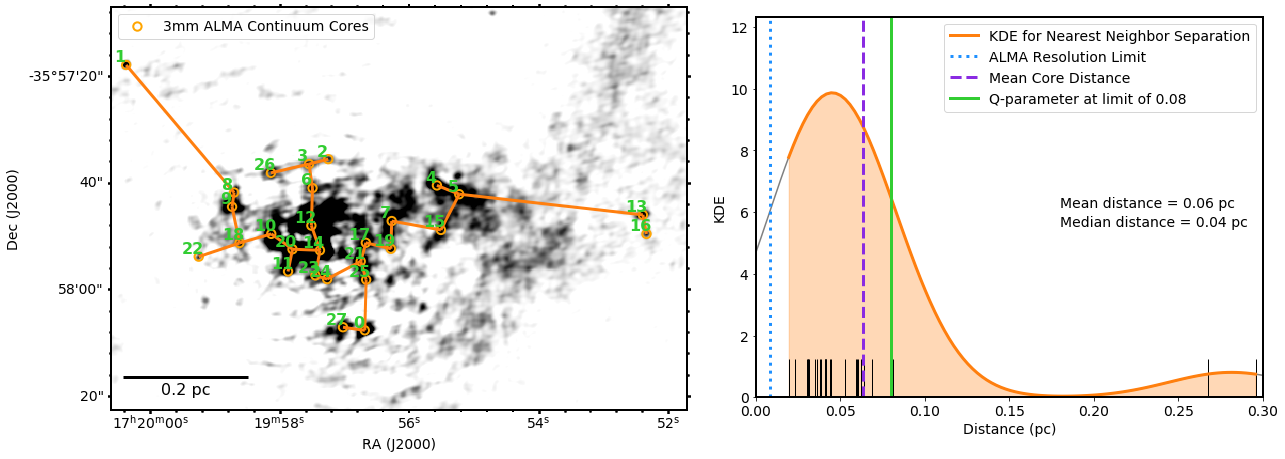

In [8]:
cont_img = '../../../data/alma_data/spw1_continuum/Continuum_peak_editunit.fits'
# Create a gridspec with 1 row and 2 columns
fig = plt.figure(figsize=(20, 7))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Create the first subplot with aplpy
ax1 = plt.subplot(gs[0])
ax1.set_visible(False)
f1 = aplpy.FITSFigure(cont_img, figure=fig, subplot=[0.1, 0.1, 0.4, 0.8], convention='calabretta')

#f1 = aplpy.FITSFigure(cont_img, figure=fig, figsize = (8,12))
f1.show_colorscale( cmap='Greys', vmin=0.09, vmax=0.8) #, vmax=1.0 #twilight  BuPu    #,  vmin=0, vmax=np.nanmax(data_k.value)
f1.recenter(259.984,  -35.96244444 , width=0.03, height=0.012) 
f1.show_markers(ra, dec, s=70, edgecolor='orange', linewidth=2, label='3mm ALMA Continuum Cores')
plt.legend(markerscale=1, fontsize = 14, loc = 'upper left')
#f1.add_colorbar(location = 'top') #location = 'top'
#f1.colorbar.set_axis_label_text('Intensity (Jy/beam)')
plt.tick_params(width=2)
f1.add_scalebar(0.2/(1760*4.84813681e-6*3600), "0.2 pc", color='k', linewidth=3.0, fontsize = 16, corner='bottom left')
f1.frame.set_linewidth(2)
f1.frame.set_color('black')

#-------------------------------------------------------

x,y=f1.world2pixel(ra,dec)

import networkx as nx

G=nx.Graph()

for i in range(len(x)):
    for j in range(0,i):
        w=np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)  # weights of each arc
        G.add_edge(i,j,weight=w)  # adding arcs and connecting the nodes

T=nx.minimum_spanning_tree(G)


x1,y1=f1.pixel2world(x,y)
#

for i in T.edges():
    L=[]
    B=[]
    L.append(x1[i[0]])
    B.append(y1[i[0]])
    L.append(x1[i[1]])
    B.append(y1[i[1]])
    iline=np.array([L,B])
    #print(iline) 
    f1.show_lines([iline], color='tab:orange', linewidth=3.0)
    #print(iline) 
    m=[]
    dl=L[0]-L[1]
    db=B[0]-B[1]
    m=db/dl

# Add labels to the nodes in the MST plot
label_offset_x = 0.0004
label_offset_y = 0.0004
for i, (ra_i, dec_i) in enumerate(zip(ra, dec)):
    f1.add_label(ra_i + label_offset_x, dec_i + label_offset_y, str(i), color='limegreen', fontsize=16, weight='bold')



##############################################
# Create the second subplot with matplotlib


ax2 = plt.subplot(gs[1])

AU=astropyC.au.si.value
pc=astropyC.pc.si.value
scale=0.2*1760*AU/pc  #convert distances in units of astronomical units (AU) to parsecs (pc) based on the 0.2 arcsec pixel size of Continuum

dist_V=[]

for i in T.edges():
    dist_V.append(T.get_edge_data(i[0], i[1])['weight']*scale)


kde=gaussian_kde(dist_V)
x=np.linspace(min(dist_V), max(dist_V), 100)
y=kde(x)
# Normalize y-axis

mean_dist=np.mean(dist_V)
print('Mean distance =', mean_dist)
median_dist=np.median(dist_V)
print('Median distance =',median_dist)
max_dist = np.max(dist_V)
print('Max distance =',max_dist)
MaXdist_in_arcsec=(max_dist*206265)/1300
print('Max distance =',MaXdist_in_arcsec)

#print('distance=', dist_V)
print('X=', x)
print('Len x=', len(x))
  
'''     
dist_in_kau=[(i*206265)/(1000.) for i in dist_V]  #converts the distances in dist_V from kilometers to kilo-astronomical units (kAU)
kde=gaussian_kde(dist_in_kau)
x=np.linspace(min(dist_in_kau), max(dist_in_kau), 100)
y=kde(x)
mean_dist=np.mean(dist_in_kau)
print('Mean distance =', mean_dist)
median_dist=np.median(dist_in_kau)
print('Median distance =',median_dist)  

'''  
##############################################
# convert the average distance from parsec to arcsec
dist_in_arcsec=(mean_dist*206265)/1760

print('MEANdist_in_arcsec=', dist_in_arcsec)


##############################################
distance_in_au = 1760.0 # distance in AU
distance_in_pc = 1760 / 206264.806 # convert to pc
print(distance_in_pc)

#imin=y.argmax()
#imin=kde(x).argmax()
#est = kde.KDE1D(x, lower=0, method=kde_methods.reflection)
#ax2.plot(dist_V, est(dist_V), color='b', label=est.method.name)



ax2.fill_between(x,0, kde(x), alpha=0.3, color='tab:orange')
sns.distplot(dist_V, kde=True, color='grey', rug=True, hist=False, rug_kws={"height": 0.1,"color": "k"})
#sns.kdeplot(dist_V, ax=ax2, cut=0, color='tab:red', common_norm=True, linewidth=2.0)
ax2.plot(x, kde(x), color='tab:orange', linewidth=3.0, label='KDE for Nearest Neighbor Separation')
ax2.axvline(1760 / 206264.806, color='dodgerblue', linestyle=':', linewidth=3.0, label='ALMA Resolution Limit')
ax2.axvline(mean_dist, color='blueviolet', linestyle='--', linewidth=3.0, label='Mean Core Distance')
ax2.axvline(0.08, color='limegreen', linestyle='-', linewidth=3.0, label='Q-parameter at limit of 0.08')
#sns.distplot(dist_V, kde=True, rug=True, hist=False, ax=ax2)
#sns.rugplot(dist_V, ax=ax2, color='black', alpha=0.5, height=0.1)
#sns.kdeplot(dist_V, ax=ax2)
#ax2.plot(x,y)
#ax2.plot(dist_V, [2]*len(dist_V), color='indigo')

ax2.legend(loc='upper right', fontsize=14)

#ax2.set_xlabel('Distance (10^3 AU)')
ax2.set_xlim([0, 0.3])
#ax2.set_xlim([-0.08, 0.38])
ax2.text(0.6, 0.5, f"Mean distance = {mean_dist:.2f} pc", transform=ax2.transAxes, fontsize=14)
ax2.text(0.6, 0.45, f"Median distance = {median_dist:.2f} pc", transform=ax2.transAxes, fontsize=14)

#ax2.text(mean_dist, 0, f"Mean distance = {mean_dist:.2f}", transform=ax2.get_xaxis_transform(), fontsize=12)

# Set up the shared axis labels
ax1.set_ylabel('DEC ')
ax1.set_xlabel('RA ')
ax2.set_ylabel('KDE')
ax2.set_xlabel('Distance (pc)')

#print('dist_in_kau', dist_in_kau)

#plt.savefig('plots/mst_kde.pdf',  bbox_inches='tight', dpi=300)

#plt.savefig('plots/mst_kde.png',  bbox_inches='tight', dpi=300)
#plt.show()    


Angle between nodes 1 and 8: -43.74 degrees
Angle between nodes 0 and 27: 6.52 degrees
Angle between nodes 0 and 25: 88.11 degrees
Angle between nodes 2 and 3: -11.53 degrees
Angle between nodes 3 and 6: -79.95 degrees
Angle between nodes 3 and 26: -10.63 degrees
Angle between nodes 4 and 5: -17.65 degrees
Angle between nodes 5 and 15: -57.64 degrees
Angle between nodes 5 and 13: -5.20 degrees
Angle between nodes 6 and 12: -87.86 degrees
Angle between nodes 7 and 19: -87.94 degrees
Angle between nodes 7 and 15: -8.33 degrees
Angle between nodes 8 and 9: -79.96 degrees
Angle between nodes 9 and 18: -75.84 degrees
Angle between nodes 10 and 20: -30.33 degrees
Angle between nodes 10 and 18: -13.14 degrees
Angle between nodes 11 and 20: 76.04 degrees
Angle between nodes 12 and 14: -66.76 degrees
Angle between nodes 13 and 16: -76.84 degrees
Angle between nodes 14 and 23: -77.48 degrees
Angle between nodes 14 and 20: 1.81 degrees
Angle between nodes 17 and 21: -71.20 degrees
Angle between n

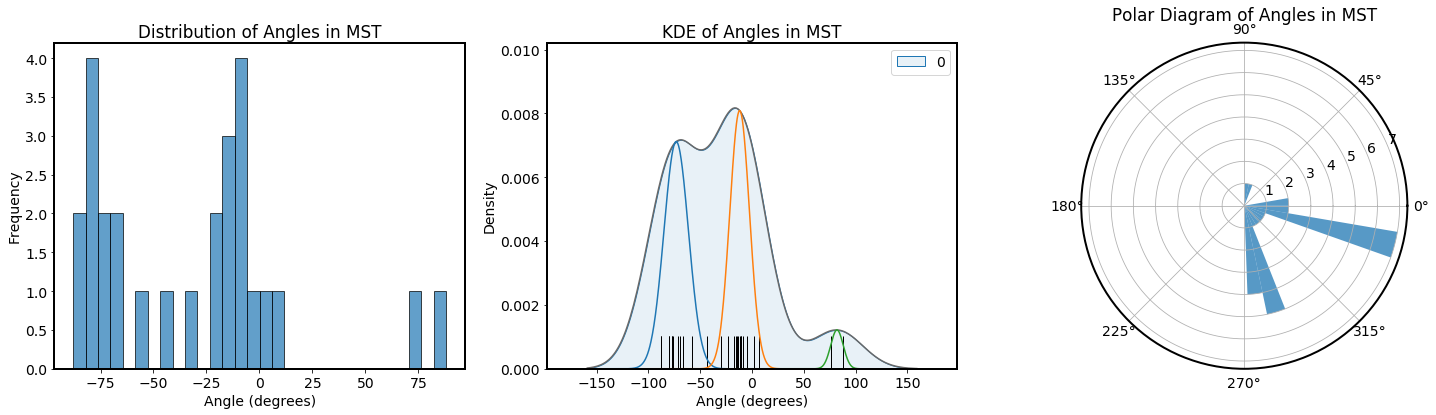

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import aplpy
import networkx as nx
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks
from scipy.stats import norm, kde
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
#----------------------------------------------------------------------

matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams['axes.linewidth'] = 2.0 #set the value globally
matplotlib.rcParams['axes.linewidth']=2
matplotlib.rcParams['xtick.labelsize']=14
matplotlib.rcParams['ytick.labelsize']=14
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['lines.linewidth']=1.5
plt.rcParams['axes.linewidth'] = 2.

#----------------------------------------------------------------------
#----------------------------------------------------------------------
'''
# Function to compute angle between two points
def compute_angle(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    angle = np.degrees(np.arctan2(dy, dx))
    if angle < 0:
        angle += 360
    return angle
'''
# Compute angles from -90 to 90 degrees
def compute_angle(x1, y1, x2, y2):
    angle = np.arctan2((y2 - y1), abs(x2 - x1)) * 180 / np.pi
    return angle    
    

# Compute angles between each pair of connected nodes

angles = []
for edge in T.edges():
    i, j = edge
    angle = compute_angle(x1[i], y1[i], x1[j], y1[j])
    angles.append(angle)
    print(f"Angle between nodes {i} and {j}: {angle:.2f} degrees")
    
# Fit a Gaussian kernel density estimation to the data
kde = gaussian_kde(angles)

angles = np.array(angles)[:, np.newaxis]

# Assuming we have 3 peaks
gmm = GaussianMixture(n_components=3)
gmm.fit(angles)

means = gmm.means_.flatten()
std_devs = np.sqrt(gmm.covariances_.flatten())

for i, (mean, std_dev) in enumerate(zip(means, std_devs)):
    print(f"Peak {i + 1} of the KDE plot: {mean:.2f} degrees")
    print(f"Standard deviation {i + 1} of the KDE plot: {std_dev:.2f} degrees")    
    
#----------------------------------------------------------------------
#----------------------------------------------------------------------

# Create a gridspec with 1 row and 3 columns
fig = plt.figure(figsize=(25, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])

# Create the first subplot for histogram
#fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(gs[0])

ax1.hist(angles, bins=30, edgecolor='k', alpha=0.7)
ax1.set_xlabel("Angle (degrees)")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Angles in MST")



#----------------------------------------------------------------------
#----------------------------------------------------------------------



# Generate a range of x values
x_values = np.linspace(-180, 180, num=1000)

# Create the second subplot for KDE
ax2 = plt.subplot(gs[1])
#sns.kdeplot(angles, shade=True, color='dimgrey')
#sns.kdeplot(angles, color="dimgrey")  # this will plot the line
sns.kdeplot(angles, color="dimgrey", fill=True, alpha=0.1)  # this will plot the shaded area

sns.distplot(angles, kde=True, color='dimgrey', rug=True, hist=False, rug_kws={"height": 0.1,"color": "k"})
ax2.set_xlabel("Angle (degrees)")
ax2.set_ylabel("Density")
ax2.set_title("KDE of Angles in MST")

# Plot each of the fitted Gaussians
for i, (mean, std_dev) in enumerate(zip(means, std_devs)):
    y_values = norm.pdf(x_values, mean, std_dev)
    y_values = y_values * kde.evaluate(mean) / norm.pdf(mean, mean, std_dev)
    plt.plot(x_values, y_values) #, label=f'Gaussian {i+1}'


#----------------------------------------------------------------------
#----------------------------------------------------------------------
# Create the third subplot for the polar diagram
ax3 = plt.subplot(gs[2], polar=True)
hist, bins, _ = ax3.hist(np.radians(angles), bins=18, alpha=0.75)
ax3.set_theta_zero_location('E')
ax3.set_theta_direction(1)
ax3.set_title("Polar Diagram of Angles in MST")
#----------------------------------------------------------------------
#----------------------------------------------------------------------
'''
# Fit a Gaussian kernel density estimation to the data
kde = gaussian_kde(angles)


# Find the peaks of the KDE plot
x_values = np.linspace(-180, 180, num=100000)
y_values = kde(x_values)
peaks, _ = find_peaks(y_values, prominence=0.001, distance=5)  # Set the minimum distance between peaks to 10
peak_angles = x_values[peaks]


# Fit Gaussian KDEs to each peak and calculate standard deviations
std_devs = []
for peak_angle in peak_angles:
    peak_data = [angle for angle in angles if peak_angle - 15 <= angle <= peak_angle + 15]
    peak_kde = gaussian_kde(peak_data)
    std_dev = np.sqrt(peak_kde.covariance[0, 0])
    std_devs.append(std_dev)

# Print the peaks and standard deviations
for i, (peak_angle, std_dev) in enumerate(zip(peak_angles, std_devs)):
    print(f"Peak {i + 1} of the KDE plot: {peak_angle:.2f} degrees")
    print(f"Standard deviation {i + 1} of the KDE plot: {std_dev:.2f} degrees")
    
#print(f"Peak of the KDE plot: {peak_angle:.1f} degrees")
#print(f"Standard deviation of the KDE plot: {std_dev:.2f} degrees")
# Show the figure
'''
#----------------------------------------------------------------------
#----------------------------------------------------------------------



plt.savefig('plots/dist_kde_polar.pdf',  bbox_inches='tight', dpi=300)
plt.savefig('plots/dist_kde_polar.png',  bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import aplpy
import networkx as nx
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks


matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams['axes.linewidth'] = 2.0 #set the value globally
matplotlib.rcParams['axes.linewidth']=2
matplotlib.rcParams['xtick.labelsize']=14
matplotlib.rcParams['ytick.labelsize']=14
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['lines.linewidth']=1.5
plt.rcParams['axes.linewidth'] = 2.


"""

# Function to compute the smaller angle between two points
def compute_smaller_angle(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    angle = np.degrees(np.arctan2(dy, dx))
    if angle < 0:
        angle += 360
    smaller_angle = min(angle, 360 - angle)
    return smaller_angle
"""


# Function to compute the smaller angle between two points
def compute_smaller_angle(x1, y1, x2, y2):
    angle = np.arctan2(abs(y2 - y1), abs(x2 - x1)) * 180 / np.pi
    return min(angle, 180 - angle)



# Compute smaller angles between each pair of connected nodes
angles = []
for edge in T.edges():
    i, j = edge
    angle = compute_smaller_angle(x1[i], y1[i], x1[j], y1[j])
    angles.append(angle)
    #print(f"Smaller angle between nodes {i} and {j}: {angle:.2f} degrees")


    
# Create a gridspec with 1 row and 3 columns
fig = plt.figure(figsize=(30, 10))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])    
# Create the first subplot for histogram
#fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(gs[0])

ax1.hist(angles, bins=30, edgecolor='k', alpha=0.7)
ax1.set_xlabel("Angle (degrees)")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Angles in MST")    
    
    
# Create the second subplot for KDE
ax2 = plt.subplot(gs[1])
sns.kdeplot(angles, shade=True)
sns.distplot(angles, kde=True, color='grey', rug=True, hist=False, rug_kws={"height": 0.1,"color": "k"})
ax2.set_xlabel("Angle (degrees)")
ax2.set_ylabel("Density")
ax2.set_title("KDE of Angles in MST")



# Create the third subplot for the polar diagram
ax3 = plt.subplot(gs[2], polar=True)
hist, bins, _ = ax3.hist(np.radians(angles), bins=18, alpha=0.75)
ax3.set_theta_zero_location('E')
ax3.set_theta_direction(1)

ax3.set_title("Polar Diagram of Angles in MST")

# Limit the polar plot to show only the quarter of the circle from 0 to 90 degrees
#ax3.set_xticks(np.radians([0, 45, 90]))
#ax3.set_ylim(0, hist.max())


# Fit a Gaussian kernel density estimation to the data
kde = gaussian_kde(angles)

# Find the peaks of the KDE plot
x_values = np.linspace(-60, 150, num=10000)
y_values = kde(x_values)
peaks, _ = find_peaks(y_values, prominence=0.007, distance=10)  # Set the minimum distance between peaks to 10
peak_angles = x_values[peaks]



# Fit Gaussian KDEs to each peak and calculate standard deviations
std_devs = []
for peak_angle in peak_angles:
    peak_data = [angle for angle in angles if peak_angle - 15 <= angle <= peak_angle + 15]
    peak_kde = gaussian_kde(peak_data)
    std_dev = np.sqrt(peak_kde.covariance[0, 0])
    std_devs.append(std_dev)

# Print the peaks and standard deviations
for i, (peak_angle, std_dev) in enumerate(zip(peak_angles, std_devs)):
    print(f"Peak {i + 1} of the KDE plot: {peak_angle:.2f} degrees")
    print(f"Standard deviation {i + 1} of the KDE plot: {std_dev:.2f} degrees")
    
    
#print(f"Peak of the KDE plot: {peak_angle:.1f} degrees")
#print(f"Standard deviation of the KDE plot: {std_dev:.2f} degrees")


plt.savefig('plots/mst_kde_polar90.pdf',  bbox_inches='tight', dpi=300)
plt.savefig('plots/mst_kde_polar90.png',  bbox_inches='tight', dpi=300)
# Show the figure
plt.show()

In [21]:

print('np.mean(x)=', np.mean(x))

# calculate the distance between the mean position and the furthest core
mean_pos = (np.mean(x), np.mean(y))
distances = [np.sqrt((x[i] - mean_pos[0])**2 + (y[i] - mean_pos[1])**2) for i in range(len(x))]
max_dist = np.max(distances)
mean_dist = np.mean(distances)
#R = (max_dist - mean_dist)/2
#print('x=', x)
print('mean_pos=', mean_pos)
#print('distances=', distances)
#print('R =', R)

print( 'max_dist=', max_dist)
# Calculate Q parameter using the formula

# Calculate the mean length of line segments in MST
m_bar = np.mean(dist_V)
print('mean length of line segments in the MST, m_bar=', m_bar)
N = len(G.nodes())
print('total number of the cores in a cluster N=', N)

# Calculate the distance between the mean position and the furthest core
R = max_dist
#np.array(max_dist) - np.array(mean_dist) 
print('R=', R)

#s_bar = np.mean([T.degree(v) for v in T.nodes()])
#print('s_bar=', s_bar)


distance=[]


for i in range(0,len(ra)):
    for j in range(len(ra)):
        distance.append(np.sqrt((ra[i]-ra[j])**2+(dec[i]-dec[j])**2))

distance=np.array_split(distance, len(ra))

mean_value=[]


for k in range(len(distance)):
    mean_value.append(distance[k].mean())
s_bar= np.sum(mean_value) 
s=(np.sum(mean_value))/(len(ra))

print('s_bar=', s_bar)
print('s_bar_arcsec=', (s_bar*206265)/1760)
print('m_bar=', m_bar)
print('m_bar_arcsec=', (m_bar*206265)/1760)

Q = ((m_bar / ((np.sqrt(N * np.pi * R**2)) / (N - 1))) / (s_bar / R))

print("Q parameter:", Q)
print(len(x))
print(len(dist_V))

#s=(np.sum(mean_dist))/(len(ra))
#s_in_arcsec=s*3600
#print('s=', s)
#print(s_in_arcsec)

np.mean(x)= 0.15763891182294232
mean_pos= (0.15763891182294232, 2.743928933303654)
max_dist= 7.126231329262026
mean length of line segments in the MST, m_bar= 0.06378110973003127
total number of the cores in a cluster N= 28
R= 7.126231329262026
s_bar= 0.24009527289302757
s_bar_arcsec= 28.138211058682003
m_bar= 0.06378110973003127
m_bar_arcsec= 7.474892385491421
Q parameter: 0.7647478661653806
100
27


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kde

print(len(x))
print(len(dist_V))
# calculate Q parameter function
def calc_Q(x, y, dist_V, G):
    # calculate the distance between the mean position and the furthest core
    mean_pos = (np.mean(x), np.mean(y))
    distances = [np.sqrt((x[i] - mean_pos[0])**2 + (y[i] - mean_pos[1])**2) for i in range(len(x))]
    max_dist = np.max(distances)
    mean_dist = np.mean(distances)

    # Calculate the mean length of line segments in MST
    m_bar = np.mean(dist_V)
    N = len(G.nodes()) if G is not None else len(x)  # check if G is not None

    # Calculate the distance between the mean position and the furthest core
    R = np.array(max_dist) - np.array(mean_dist) 

    distance=[]

    for i in range(0,len(x)):
        for j in range(len(x)):
            distance.append(np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2))

    distance=np.array_split(distance, len(x))

    mean_value=[]

    for k in range(len(distance)):
        mean_value.append(distance[k].mean())
    s_bar= np.sum(mean_value) 
    s=(np.sum(mean_value))/(len(x))

    Q = ((m_bar / ((np.sqrt(N * np.pi * R**2)) / (N - 1))) / (s_bar / R))

    return Q


print(len(x))
print(len(dist_V))


# calculate Q parameter for the whole sample
Q_whole = calc_Q(x, y, dist_V, G)

# perform iterative process of removing 20% of the cores for 100 times
Q_values = []
for i in range(27):
    # remove 20% of the cores randomly
    indices = np.random.choice(len(dist_V), int(len(dist_V) * 0.8), replace=False)
    x_new = x[indices]
    y_new = y[indices]
    dist_V_new = [dist_V[j] for j in indices]
    G_new = None

    # calculate Q parameter for the subsample
    Q = calc_Q(x_new, y_new, dist_V_new, G_new)
    Q_values.append(Q)


# calculate the standard deviation of Q_values
std = np.std(Q_values)

# plot the KDE of Q_values
fig = plt.figure(figsize=(10, 7))
kde = kde.gaussian_kde(Q_values)
x_plot = np.linspace(np.min(Q_values), np.max(Q_values), 1000)
plt.plot(x_plot, kde(x_plot), color='tab:orange', linewidth=3.0, label='KDE')

# plot the fitted Gaussian distribution
mu, std_fit = norm.fit(Q_values)
plt.plot(x_plot, norm(x_plot, mu, std_fit), color='gray', linestyle='--', label='Gaussian fit')

plt.xlabel('Q parameter')
plt.ylabel('Density')
plt.title('KDE of Q parameter with fitted Gaussian')
plt.legend()
plt.savefig('plots/Q_err.pdf',  bbox_inches='tight', dpi=300)
plt.show()

print(f"Q parameter whole sample: {Q_whole}")
print(f"Uncertainty of Q parameter: {std}")
print('mu=', mu)


Q_err 2 info:

Q parameter whole sample: 0.0005203101502455342

Uncertainty of Q parameter: 0.0006482424156136642

mu= 0.004211131470304511

In [ ]:
#Estimate the error of Q parameters

print(len(x))
print(len(dist_V))

import numpy as np

# Define the function to calculate Q
def calculate_Q(x, y, dist_V, G):
    # Calculate the distance between each core and the mean position
    mean_pos = (np.mean(x), np.mean(y))
    distances = [np.sqrt((x[i] - mean_pos[0])**2 + (y[i] - mean_pos[1])**2) for i in range(len(x))]
    
    # Calculate the maximum and mean distances
    max_dist = np.max(distances)
    mean_dist = np.mean(distances)
    
    # Calculate the mean length of line segments in the MST
    m_bar = np.mean(dist_V)
    
    # Calculate the total number of cores
    N = len(G.nodes())
    
    # Calculate R
    R = max_dist - mean_dist
    
    # Calculate the mean degree of separation between the cores
    s_bar = np.mean([G.degree(v) for v in G.nodes()])
    
    # Calculate Q
    Q = ((m_bar / ((np.sqrt(N * np.pi * R**2)) / (N - 1))) / (s_bar / R))
    
    return Q

# Define the function to randomly remove 20% of the cores
def remove_cores(x, y, dist_V, G):
    N = len(x)
    num_to_remove = int(N * 0.2)
    indices_to_remove = np.random.choice(N, num_to_remove, replace=False)
    x_new = np.delete(x, indices_to_remove)
    y_new = np.delete(y, indices_to_remove)
    dist_V_new = np.delete(dist_V, indices_to_remove)
    G_new = G.copy()
    G_new.remove_nodes_from(indices_to_remove)
    return x_new, y_new, dist_V_new, G_new

# Run the Q calculation with randomly removed cores 100 times
Q_list = []
for i in range(100):
    x_new, y_new, dist_V_new, G_new = remove_cores(x, y, dist_V, G)
    Q_new = calculate_Q(x_new, y_new, dist_V_new, G_new)
    Q_list.append(Q_new)

# Calculate the standard deviation of the Q values
std_Q = np.std(Q_list)

print("Standard deviation of Q parameter:", std_Q)



In [ ]:
from pyqt_fit import kde
from pyqt_fit import kde, kde_methods


y=kde.KDE1D(dist_V)

est_line=kde.KDE1D(dist_V, lower=0, method=kde_methods.linear_combination)

#plt.plot(x, y(x), label='normal' )

plt.ylabel('KDE (Distance between cores)')

plt.xlabel('Distance (pc)')

plt.plot(x, est_line(x), 'b', label='truncated') #label=est_line.method.name, label='truncated')

plt.plot(dist_V, [0.5]*len(dist_V), '|')

In [ ]:
import numpy as np
import networkx as nx
import aplpy
import seaborn as sns


# Build the minimum spanning tree
G = nx.Graph()
for i in range(len(x)):
    for j in range(0, i):
        w = np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)
        G.add_edge(i, j, weight=w)
T = nx.minimum_spanning_tree(G)

# Plot the minimum spanning tree
x1, y1 = f1.pixel2world(x, y)
for i in T.edges():
    L = [x1[i[0]], x1[i[1]]]
    B = [y1[i[0]], y1[i[1]]]
    iline = np.array([L, B])
    #f1.show_lines([iline], color='tab:orange', linewidth=3.0)

# Plot the KDE
sns.kdeplot(x, y)
plt.show()